# Análise Exploratória - Dataset de Diabetes

Este notebook realiza uma análise exploratória do dataset de diabetes, focando em:

- Carregamento e visualização inicial dos dados
- Análise descritiva das variáveis
- Identificação e tratamento de valores ausentes
- Visualização da distribuição da variável alvo
- Análise de correlação entre variáveis
- Visualização de distribuições por classe

## Dataset

O dataset utilizado contém informações sobre diagnóstico de diabetes em pacientes, com variáveis clínicas numéricas e uma variável alvo binária (0 = Não diabético, 1 = Diabético).

### Características do Dataset

- **Fonte**: Kaggle - Diabetes Data Set
- **Tamanho**: 768 amostras
- **Features**: 8 características clínicas (Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin, BMI, DiabetesPedigreeFunction, Age)
- **Variável Alvo**: Outcome (0 ou 1)

## 1. Carregamento dos Dados

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import yaml
from pathlib import Path

# Configuração de visualização
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)

# Carregar configurações
with open("../config.yaml", "r") as f:
    config = yaml.safe_load(f)

# Carregar dataset de diabetes
diabetes_path = "../data/tabular/diabetes.csv"
df = pd.read_csv(diabetes_path)

print(f"Dataset carregado: {df.shape[0]} amostras, {df.shape[1]} features")
print(f"\nPrimeiras linhas do dataset:")
df.head()

Dataset carregado: 768 amostras, 9 features

Primeiras linhas do dataset:


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


## 2. Análise Descritiva dos Dados

Nesta seção, analisamos informações gerais sobre o dataset:
- Tipos de dados de cada coluna
- Quantidade de valores não nulos
- Estatísticas descritivas (média, desvio padrão, quartis, etc.)

In [8]:
# Informações gerais sobre o dataset
print("=" * 60)
print("INFORMAÇÕES GERAIS DO DATASET")
print("=" * 60)
df.info()
print("\n" + "=" * 60)
print("ESTATÍSTICAS DESCRITIVAS")
print("=" * 60)
df.describe()

INFORMAÇÕES GERAIS DO DATASET
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB

ESTATÍSTICAS DESCRITIVAS


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


## 3. Identificação de Valores Ausentes

Verificamos se existem valores ausentes ou inconsistentes no dataset. No dataset de diabetes, valores ausentes podem estar representados como 0 em algumas colunas (como Insulin, BloodPressure, SkinThickness).

In [9]:
# Verificar valores ausentes explícitos
print("Valores ausentes (NaN) por coluna:")
print(df.isnull().sum())
print(f"\nTotal de valores ausentes: {df.isnull().sum().sum()}")

# Visualização de valores ausentes
if df.isnull().sum().sum() > 0:
    msno.matrix(df)
    plt.title("Visualização de Valores Ausentes")
    plt.show()

# Verificar valores zero que podem representar ausentes
# (comum em Insulin, BloodPressure, SkinThickness)
print("\n" + "=" * 60)
print("VALORES ZERO QUE PODEM REPRESENTAR AUSENTES")
print("=" * 60)
zero_counts = {}
for col in df.columns:
    if col != 'Outcome':
        zero_count = (df[col] == 0).sum()
        zero_pct = (zero_count / len(df)) * 100
        if zero_count > 0:
            zero_counts[col] = {'count': zero_count, 'percentage': zero_pct}

if zero_counts:
    zero_df = pd.DataFrame(zero_counts).T
    zero_df.columns = ['Quantidade', 'Percentual (%)']
    print(zero_df)
else:
    print("Nenhum valor zero encontrado.")

Valores ausentes (NaN) por coluna:
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

Total de valores ausentes: 0

VALORES ZERO QUE PODEM REPRESENTAR AUSENTES
               Quantidade  Percentual (%)
Pregnancies         111.0       14.453125
Glucose               5.0        0.651042
BloodPressure        35.0        4.557292
SkinThickness       227.0       29.557292
Insulin             374.0       48.697917
BMI                  11.0        1.432292


## 4. Análise da Variável Alvo (Outcome)

Visualizamos a distribuição da variável alvo para entender o balanceamento das classes.

DISTRIBUIÇÃO DA VARIÁVEL ALVO (OUTCOME)

0 (Não Diabético): 500 casos (65.10%)
1 (Diabético): 268 casos (34.90%)

Total: 768 casos


/var/folders/z0/p2hx72112w32dht8ryjfkly80000gn/T/ipykernel_4285/1450482651.py:20: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[0].set_xticklabels(['Não Diabético', 'Diabético'])


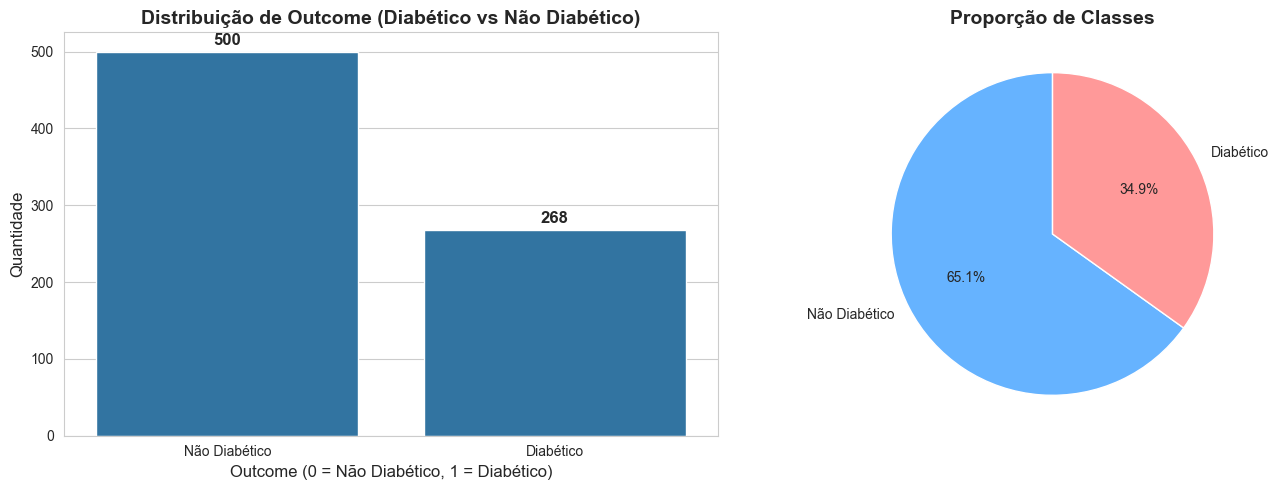

In [10]:
# Distribuição da variável alvo
outcome_counts = df['Outcome'].value_counts()
outcome_percentages = df['Outcome'].value_counts(normalize=True) * 100

print("=" * 60)
print("DISTRIBUIÇÃO DA VARIÁVEL ALVO (OUTCOME)")
print("=" * 60)
print(f"\n0 (Não Diabético): {outcome_counts[0]} casos ({outcome_percentages[0]:.2f}%)")
print(f"1 (Diabético): {outcome_counts[1]} casos ({outcome_percentages[1]:.2f}%)")
print(f"\nTotal: {len(df)} casos")

# Visualizações
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Gráfico de barras
sns.countplot(x='Outcome', data=df, ax=axes[0])
axes[0].set_title('Distribuição de Outcome (Diabético vs Não Diabético)', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Outcome (0 = Não Diabético, 1 = Diabético)', fontsize=12)
axes[0].set_ylabel('Quantidade', fontsize=12)
axes[0].set_xticklabels(['Não Diabético', 'Diabético'])

# Adicionar valores nas barras
for i, v in enumerate(outcome_counts):
    axes[0].text(i, v + 5, str(v), ha='center', va='bottom', fontsize=12, fontweight='bold')

# Gráfico de pizza
axes[1].pie(outcome_counts.values, labels=['Não Diabético', 'Diabético'], 
            autopct='%1.1f%%', startangle=90, colors=['#66b3ff', '#ff9999'])
axes[1].set_title('Proporção de Classes', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()

## 5. Distribuição das Features por Classe

Analisamos como cada feature se distribui para as classes diabético e não diabético.

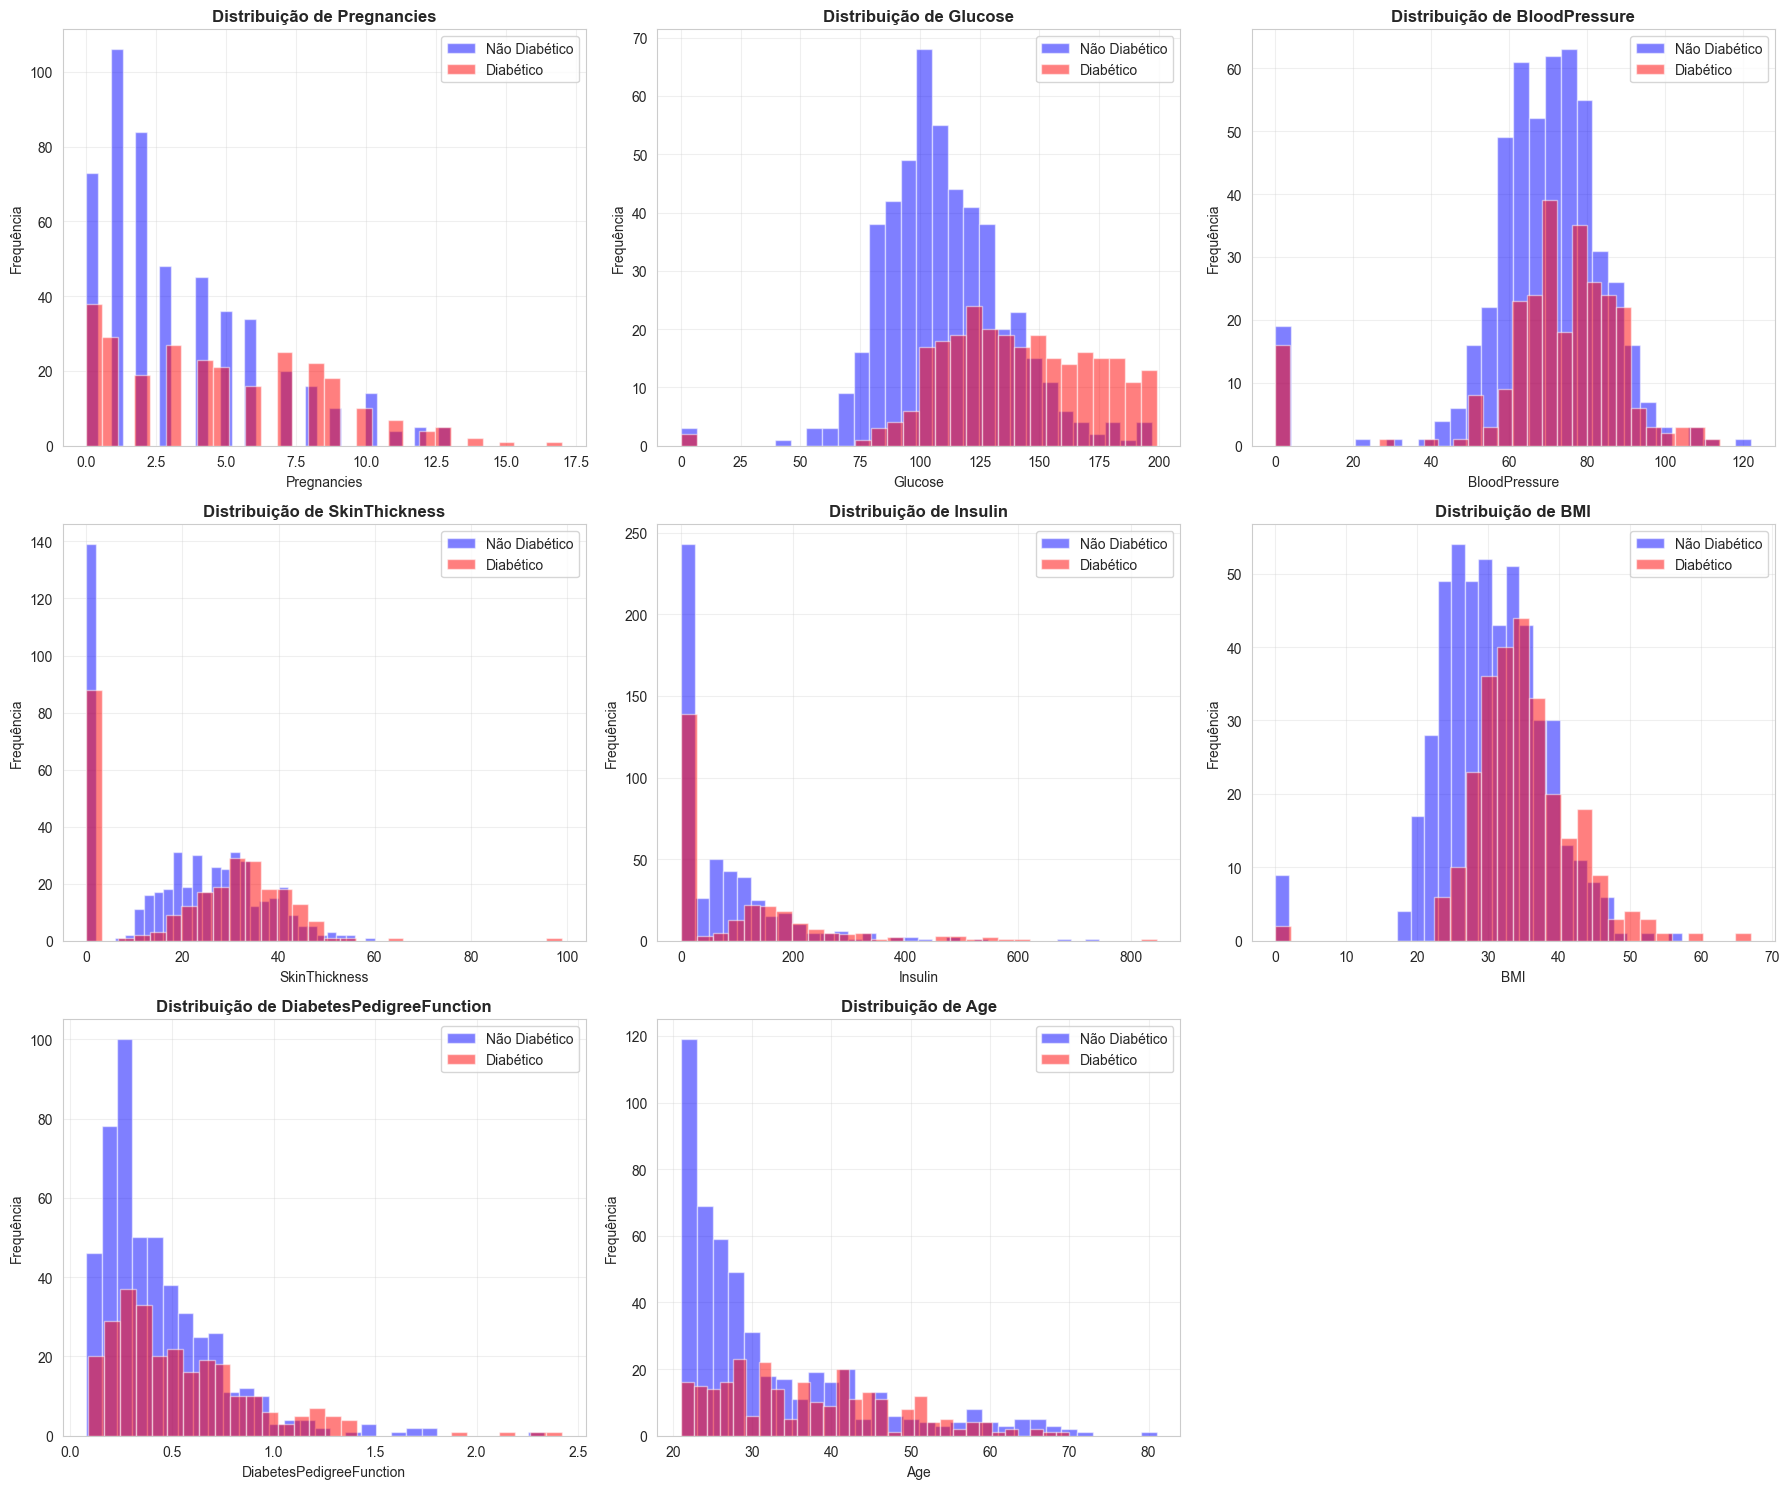

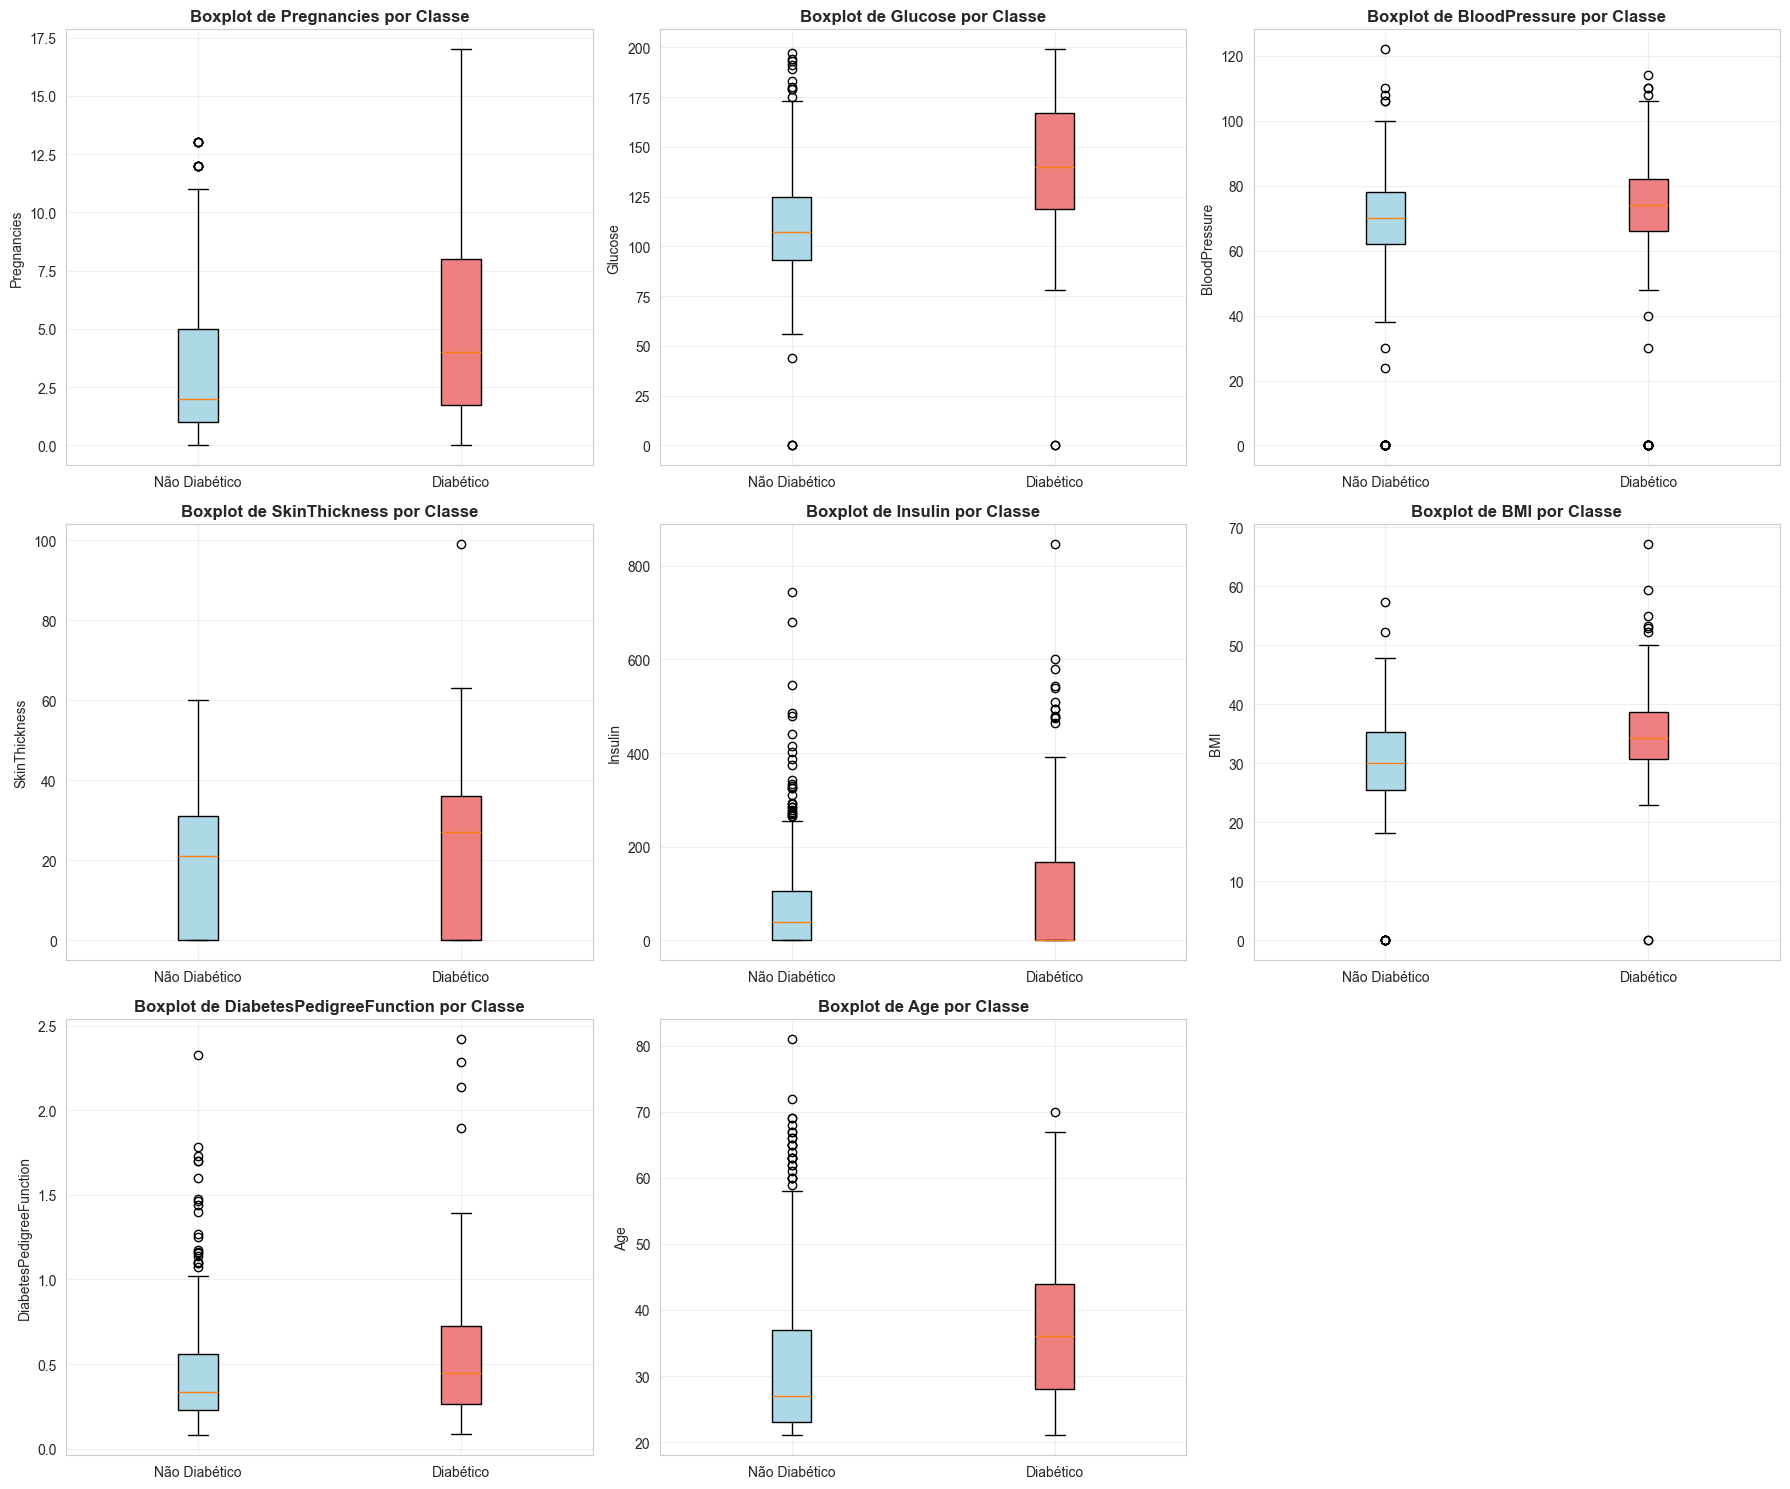

In [11]:
# Selecionar features numéricas (excluir Outcome)
features = df.columns.drop('Outcome').tolist()

# Criar subplots para histogramas e boxplots
n_features = len(features)
n_cols = 3
n_rows = (n_features + n_cols - 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, 5 * n_rows))
axes = axes.flatten() if n_features > 1 else [axes]

for idx, feature in enumerate(features):
    ax = axes[idx]
    
    # Histograma por classe
    df[df['Outcome'] == 0][feature].hist(bins=30, alpha=0.5, label='Não Diabético', ax=ax, color='blue')
    df[df['Outcome'] == 1][feature].hist(bins=30, alpha=0.5, label='Diabético', ax=ax, color='red')
    
    ax.set_title(f'Distribuição de {feature}', fontsize=12, fontweight='bold')
    ax.set_xlabel(feature, fontsize=10)
    ax.set_ylabel('Frequência', fontsize=10)
    ax.legend()
    ax.grid(True, alpha=0.3)

# Remover subplots vazios
for idx in range(n_features, len(axes)):
    fig.delaxes(axes[idx])

plt.tight_layout()
plt.show()

# Boxplots comparativos
fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, 5 * n_rows))
axes = axes.flatten() if n_features > 1 else [axes]

for idx, feature in enumerate(features):
    ax = axes[idx]
    
    # Criar DataFrame para boxplot
    plot_data = []
    labels = []
    for outcome in [0, 1]:
        plot_data.append(df[df['Outcome'] == outcome][feature].values)
        labels.append('Não Diabético' if outcome == 0 else 'Diabético')
    
    bp = ax.boxplot(plot_data, tick_labels=labels, patch_artist=True)
    bp['boxes'][0].set_facecolor('lightblue')
    bp['boxes'][1].set_facecolor('lightcoral')
    
    ax.set_title(f'Boxplot de {feature} por Classe', fontsize=12, fontweight='bold')
    ax.set_ylabel(feature, fontsize=10)
    ax.grid(True, alpha=0.3)

# Remover subplots vazios
for idx in range(n_features, len(axes)):
    fig.delaxes(axes[idx])

plt.tight_layout()
plt.show()

## 6. Análise de Correlação

A matriz de correlação ajuda a identificar relações lineares entre as variáveis numéricas. Isso é útil para:
- Identificar variáveis altamente correlacionadas (possível redundância)
- Entender quais variáveis podem ser mais relevantes para o modelo
- Detectar padrões nos dados

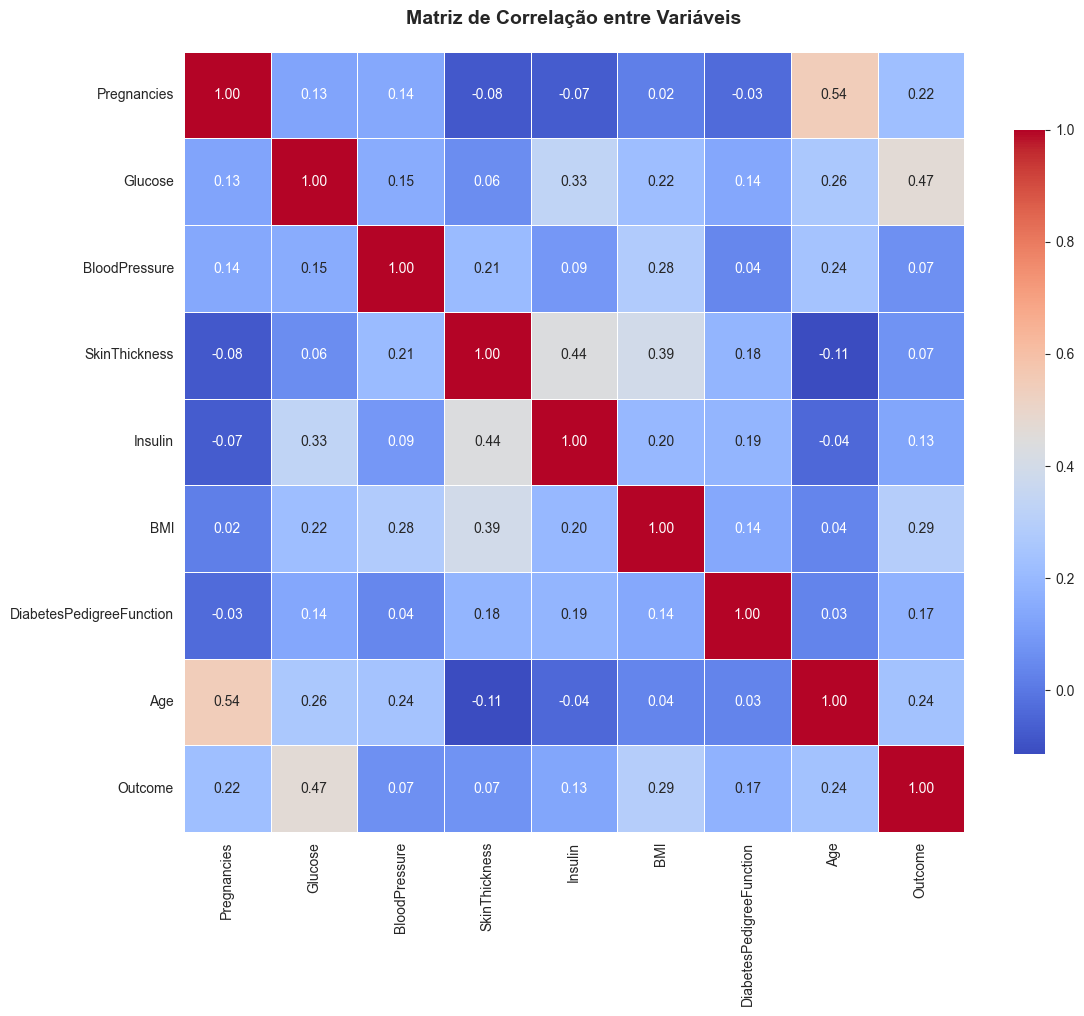

CORRELAÇÃO DAS FEATURES COM OUTCOME

Features ordenadas por correlação com Outcome:
Glucose                       :  0.467
BMI                           :  0.293
Age                           :  0.238
Pregnancies                   :  0.222
DiabetesPedigreeFunction      :  0.174
Insulin                       :  0.131
SkinThickness                 :  0.075
BloodPressure                 :  0.065


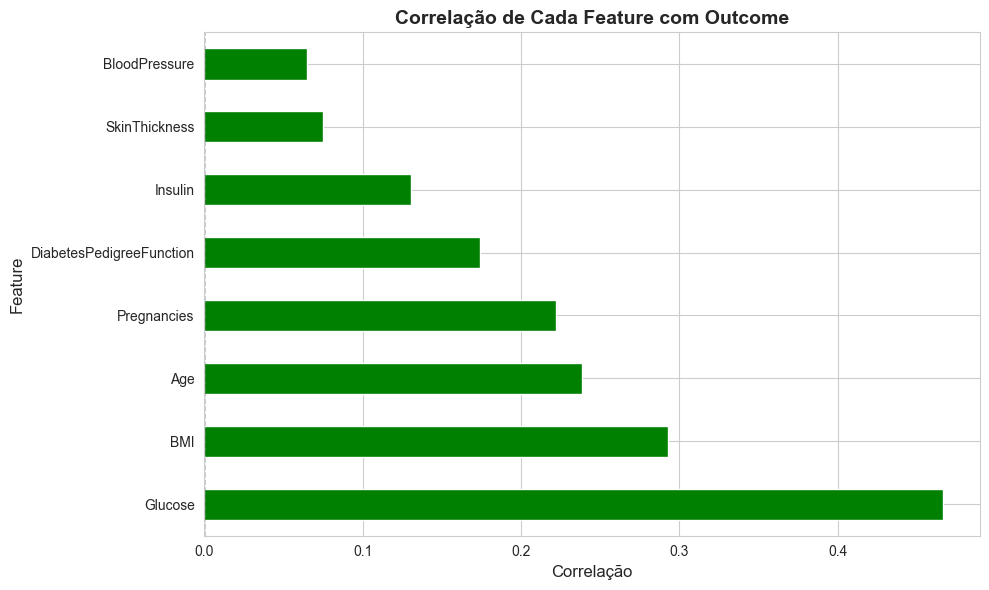

In [12]:
# Calcular matriz de correlação
correlation_matrix = df.corr()

# Plotar heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', 
            square=True, linewidths=0.5, cbar_kws={"shrink": 0.8})
plt.title('Matriz de Correlação entre Variáveis', fontsize=14, fontweight='bold', pad=20)
plt.tight_layout()
plt.show()

# Correlação com Outcome
print("=" * 60)
print("CORRELAÇÃO DAS FEATURES COM OUTCOME")
print("=" * 60)
outcome_corr = correlation_matrix['Outcome'].drop('Outcome').sort_values(ascending=False)
print("\nFeatures ordenadas por correlação com Outcome:")
for feature, corr in outcome_corr.items():
    print(f"{feature:30s}: {corr:6.3f}")

# Visualizar correlações com Outcome
plt.figure(figsize=(10, 6))
outcome_corr.plot(kind='barh', color=['red' if x < 0 else 'green' for x in outcome_corr.values])
plt.title('Correlação de Cada Feature com Outcome', fontsize=14, fontweight='bold')
plt.xlabel('Correlação', fontsize=12)
plt.ylabel('Feature', fontsize=12)
plt.axvline(x=0, color='black', linestyle='--', linewidth=1)
plt.tight_layout()
plt.show()

## 7. Resumo e Conclusões da Exploração

### Principais Observações:

1. **Desbalanceamento de Classes**: O dataset apresenta um desbalanceamento moderado entre classes (aproximadamente 65% não diabético vs 35% diabético). Isso deve ser considerado na modelagem.

2. **Valores Zero**: Algumas features apresentam valores zero que podem representar dados ausentes:
   - **Insulin**: Pode ter muitos zeros (representando não medição)
   - **BloodPressure, SkinThickness**: Também podem ter zeros que não fazem sentido clinicamente

3. **Features Mais Correlacionadas com Outcome**:
   - Glucose (glicose) - geralmente a mais correlacionada
   - BMI (índice de massa corporal)
   - Age (idade)
   - DiabetesPedigreeFunction

4. **Próximos Passos**:
   - Tratar valores zero que podem ser ausentes
   - Aplicar técnicas de balanceamento se necessário
   - Preparar pipeline de pré-processamento
   - Treinar modelos de classificação

### Observação sobre Valores Zero

No dataset de diabetes, valores zero em features como BloodPressure, SkinThickness e Insulin geralmente representam valores ausentes, não medidas válidas. Isso deve ser tratado no pré-processamento antes da modelagem.